In [24]:
import pandas as pd
from sqlalchemy import create_engine, text
import seaborn as sns

In [25]:
# connect to the database, join and import the data

username = "gruppe06"
password = "b5CEwmEnQkRnuzWE"
host = "db.fau-bank.de"
database = "sjb"
port = 5432

connection_url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'

engine = create_engine(connection_url)

with engine.connect() as connection:
    query = text("SELECT * FROM gruppe06.hr_warehouse LEFT JOIN hr.attrition ON gruppe06.hr_warehouse.employeeid = hr.attrition.employeeid;")
    df = pd.read_sql(query, connection)

df.head()

,employeeid,age,Attrition,department,distancefromhome,education,educationfield,gender,joblevel,jobrole,...,jobinvolvement,performancerating,environmentsatisfaction,jobsatisfaction,worklifebalance,employeeid,attrition,businesstravel,trainingtimelastyear,totalworkingyears
0,12,36,No,1,28,High School Degree,Business Administration,Male,1,Bank Branch Employee,...,NaN,NaN,NaN,NaN,NaN,12,No,Travel_Rarely,2,16
1,41,36,No,1,8,Bachelor Degree,Other,Female,3,Sales Executive,...,NaN,NaN,NaN,NaN,NaN,41,No,Travel_Frequently,2,4
2,3,32,No,1,17,Master Degree,Other,Male,4,Sales Executive,...,3.0,3.0,2.0,2.0,1.0,3,No,Travel_Frequently,2,5
3,2,31,Yes,1,10,High School Degree,Business Administration,Female,1,Financial Consultant,...,2.0,4.0,3.0,2.0,4.0,2,Yes,Travel_Frequently,3,6
4,4,38,No,1,2,Doctorate,Business Administration,Male,3,Human Resources,...,2.0,3.0,4.0,4.0,3.0,4,No,Non-Travel,5,13


In [26]:
# equivant to summary method in R
df.describe()

,employeeid,age,distancefromhome,joblevel,monthlyincome,numcompaniesworked,percentsalaryhike,yearsatcompany,yearssincelastpromotion,jobinvolvement,performancerating,environmentsatisfaction,jobsatisfaction,worklifebalance,employeeid,trainingtimelastyear,totalworkingyears
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4410.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.063946,65029.312925,2.694830,15.209524,7.008163,2.187755,2.727987,3.153686,2.724520,2.724983,2.761498,2205.500000,2.799320,11.279365
std,1273.201673,9.133301,8.105026,1.106689,47068.888559,2.498887,3.659108,6.125135,3.221699,0.711318,0.360689,1.092955,1.101498,0.706921,1273.201673,1.288978,7.774286
min,1.000000,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1103.250000,30.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,3.000000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1103.250000,2.000000,6.000000
50%,2205.500000,36.000000,7.000000,2.000000,49190.000000,2.000000,14.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2205.500000,3.000000,10.000000
75%,3307.750000,43.000000,14.000000,3.000000,83800.000000,4.000000,18.000000,9.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3307.750000,3.000000,15.000000
max,4410.000000,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4410.000000,6.000000,40.000000


In [27]:
# check for missing values in each column
df.isna().sum()

employeeid                  0
age                         0
Attrition                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
gender                      0
joblevel                    0
jobrole                     0
martialstatus               0
monthlyincome               0
numcompaniesworked         19
percentsalaryhike           0
yearsatcompany              0
yearssincelastpromotion     0
jobinvolvement             83
performancerating          83
environmentsatisfaction    83
jobsatisfaction            83
worklifebalance            83
employeeid                  0
attrition                   0
businesstravel              0
trainingtimelastyear        0
totalworkingyears           0
dtype: int64

In [28]:
# drop rows with missing values
df = df.dropna()

In [29]:
# remove employeeid column
df = df.drop(columns=["employeeid", "Attrition"])

In [30]:
# map yes and no to 1 and 0
df['attrition'] = df['attrition'].map({'Yes': 1, 'No': 0})

In [31]:
# convert categorical variables to numerical
df['gender'] = df['gender'].astype('category')
df['martialstatus'] = df['martialstatus'].astype('category')
df['education'] = df['education'].astype('category')
df['educationfield'] = df['educationfield'].astype('category')
df['jobrole'] = df['jobrole'].astype('category')
df['businesstravel'] = df['businesstravel'].astype('category')
df['department'] = df['department'].astype('category')

# summary equivalent to one column
df['gender'].value_counts()

gender
Male      2576
Female    1732
Name: count, dtype: int64

In [32]:
# equivant to summary method in R
df.describe()

,age,distancefromhome,joblevel,monthlyincome,numcompaniesworked,percentsalaryhike,yearsatcompany,yearssincelastpromotion,jobinvolvement,performancerating,environmentsatisfaction,jobsatisfaction,worklifebalance,attrition,trainingtimelastyear,totalworkingyears
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,36.929666,9.195915,2.065924,65062.451253,2.692201,15.213556,7.027391,2.189183,2.728180,3.154132,2.724234,2.725395,2.761606,0.161792,2.796657,11.284587
std,9.141227,8.095447,1.106294,47042.610566,2.496799,3.662748,6.146852,3.231449,0.711232,0.361117,1.093322,1.101337,0.707217,0.368303,1.289873,7.782824
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,29222.500000,1.000000,12.000000,3.000000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.000000,2.000000,6.000000
50%,36.000000,7.000000,2.000000,49360.000000,2.000000,14.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,3.000000,10.000000
75%,43.000000,14.000000,3.000000,83810.000000,4.000000,18.000000,9.250000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,0.000000,3.000000,15.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,6.000000,40.000000


In [33]:
# save dataframe to csv instead of RData file
df.to_csv('dataframe.csv', index=False)

### Calculate Association Rules

In [34]:
from efficient_apriori import apriori

df1 = pd.read_csv("dataframe.csv")

# Select only categorical columns
categorical_columns = [
    'department', 'education', 'educationfield', 'gender', 'joblevel', 
    'jobrole', 'martialstatus', 'businesstravel', 'attrition'
]
df_categorical = df1[categorical_columns].copy()

# Convert selected columns to string representations
for col in ['joblevel', 'attrition', 'department']:
    df_categorical[col] = df_categorical[col].astype(str).apply(lambda x: f"{col}={x}")

# Creating transactions
transactions = [tuple(row) for row in df_categorical.values.tolist()]

# Apply the apriori algorithm
itemsets, rules = apriori(transactions, min_support=0.02,min_confidence=0.2)

# Filter rules with "attrition" in the RHS
attrition_rules = [rule for rule in rules if 'attrition=1' in rule.rhs and len(rule.rhs) == 1]

# Sorting the rules based on confidence and lift to find the most indicative factors
sorted_rules = sorted(attrition_rules, key=lambda rule: (rule.confidence, rule.lift), reverse=True)

# Create a summary table
rules_data = []
for rule in sorted_rules:
    lhs = ', '.join(rule.lhs)
    support = rule.support
    confidence = rule.confidence
    lift = rule.lift
    rules_data.append({'LHS': lhs, 'Support': support, 'Confidence': confidence, 'Lift': lift})

rules_df = pd.DataFrame(rules_data)

rules_df

,LHS,Support,Confidence,Lift
0,"Single, Travel_Frequently",0.024605,0.381295,2.356698
1,"Professional Education, Single",0.020891,0.342205,2.115094
2,"Single, department=1, joblevel=1",0.026927,0.311828,1.927338
3,"Business Administration, Single, department=1",0.029480,0.284116,1.756059
4,"Business Administration, Male, Single",0.023677,0.281768,1.741544
5,"Male, Single, joblevel=1",0.022052,0.276968,1.711876
6,"Male, Single, department=1",0.032962,0.275194,1.700911
7,"Male, Single, Travel_Rarely, department=1",0.022748,0.268493,1.659496
8,"Male, Single",0.051996,0.267943,1.656093
9,"Business Administration, Single",0.038069,0.267537,1.653584


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("dataframe.csv")

# Recaclculate the apriori algorithm for all transactions
itemsets, rules = apriori(transactions, min_confidence=0.01, min_support=0.001)

#### Plot 1: attrition by martialstatus

Text(0, 0.5, 'Attrition Rate')

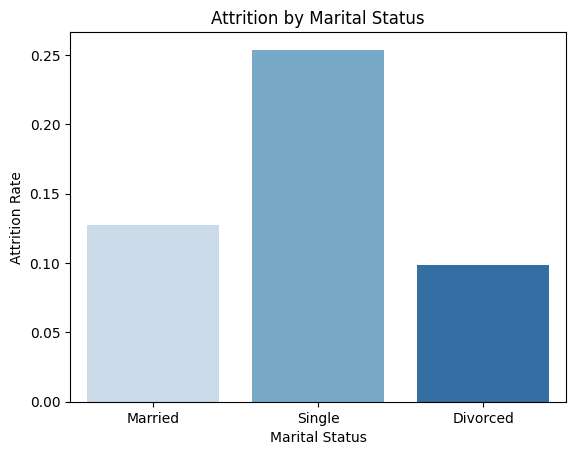

In [36]:
# Plot the relationship between martialstatus and attrition
plot1 = sns.barplot(
    data=data,
    y=data.groupby(['martialstatus'])['attrition'].transform('mean'),
    palette='Blues',
    x='martialstatus',
    hue='martialstatus'
)

plot1.set_title("Attrition by Marital Status")
plot1.set_xlabel("Marital Status")
plot1.set_ylabel("Attrition Rate")

In [37]:
# Filter martialstatus rules
attrition_rules = [
    rule for rule in rules
    if 'attrition=1' in rule.rhs 
    and len(rule.rhs) == 1 
    and len(rule.lhs) == 1 
    and any(status in rule.lhs for status in data['businesstravel'].unique())
]

summary_martialstatus_df = pd.DataFrame({
    'Martial Status': [rule.lhs[0] for rule in attrition_rules],
    'Support': [rule.support for rule in attrition_rules],
    'Confidence': [rule.confidence for rule in attrition_rules],
    'Lift': [rule.lift for rule in attrition_rules]
})

summary_martialstatus_df

,Martial Status,Support,Confidence,Lift
0,Non-Travel,0.008357,0.081633,0.504553
1,Travel_Frequently,0.046425,0.246609,1.524235
2,Travel_Rarely,0.107010,0.150851,0.932375


#### Plot 2: attrition by martialstatus and gender

Text(0, 0.5, 'Attrition Rate')

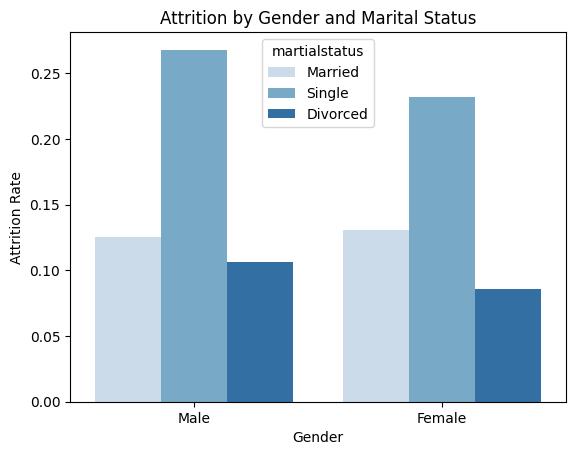

In [38]:
# Plot the relationship between gender martialstatus and attrition
plot2 = sns.barplot(
    data=data,
    x='gender',
    y=data.groupby(['gender', 'martialstatus'])['attrition'].transform('mean'),
    hue='martialstatus',
    palette='Blues',
)

plot2.set_title("Attrition by Gender and Marital Status")
plot2.set_xlabel("Gender")
plot2.set_ylabel("Attrition Rate")

In [39]:
# Filter the attrition rules
attrition_rules = [
    rule for rule in rules
    if 'attrition=1' in rule.rhs 
    and len(rule.rhs) == 1 
    and len(rule.lhs) == 2 
    and any(gender in rule.lhs for gender in data['gender'].unique())
    and any(mstatus in rule.lhs for mstatus in data['martialstatus'].unique())
]

# Create a summary table
summary_gender_mstatus_df = pd.DataFrame({
    'Gender': [lhs[0] if 'gender' in lhs[0] else lhs[1] for lhs in (rule.lhs for rule in attrition_rules)],
    'Martialstatus': [lhs[1] if 'martialstatus' in lhs[1] else lhs[0] for lhs in (rule.lhs for rule in attrition_rules)],
    'Support': [rule.support for rule in attrition_rules],
    'Confidence': [rule.confidence for rule in attrition_rules],
    'Lift': [rule.lift for rule in attrition_rules]
})

summary_gender_mstatus_df

,Gender,Martialstatus,Support,Confidence,Lift
0,Female,Divorced,0.007196,0.086111,0.532233
1,Male,Divorced,0.014624,0.106599,0.658864
2,Married,Female,0.025070,0.130909,0.809120
3,Single,Female,0.029480,0.232176,1.435024
4,Married,Male,0.033426,0.125326,0.774614
5,Single,Male,0.051996,0.267943,1.656093


#### Plot 3: attrition by travel frequency

Text(0, 0.5, 'Attrition Rate')

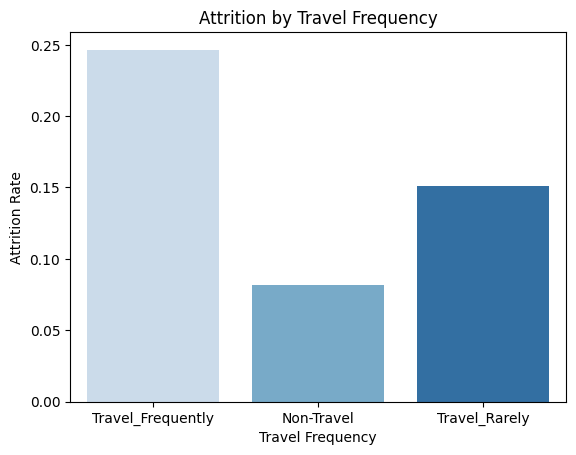

In [40]:
# Plot the relationship between travel frequency and attrition
plot3 = sns.barplot(
    data=data,
    y=data.groupby(['businesstravel'])['attrition'].transform('mean'),
    palette='Blues',
    x='businesstravel',
    hue='businesstravel'
)

plot3.set_title("Attrition by Travel Frequency")
plot3.set_xlabel("Travel Frequency")
plot3.set_ylabel("Attrition Rate")

In [41]:
# Filter businesstravel rules
attrition_rules = [
    rule for rule in rules
    if 'attrition=1' in rule.rhs 
    and len(rule.rhs) == 1 
    and len(rule.lhs) == 1 
    and any(status in rule.lhs for status in data['businesstravel'].unique())
]

summary_businesstravel_df = pd.DataFrame({
    'Travel Frequency': [rule.lhs[0] for rule in attrition_rules],
    'Support': [rule.support for rule in attrition_rules],
    'Confidence': [rule.confidence for rule in attrition_rules],
    'Lift': [rule.lift for rule in attrition_rules]
})

summary_businesstravel_df

,Travel Frequency,Support,Confidence,Lift
0,Non-Travel,0.008357,0.081633,0.504553
1,Travel_Frequently,0.046425,0.246609,1.524235
2,Travel_Rarely,0.107010,0.150851,0.932375


#### Plot 4: attrition by education

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Master Degree'),
  Text(1, 0, 'High School Degree'),
  Text(2, 0, 'Doctorate'),
  Text(3, 0, 'Professional Education'),
  Text(4, 0, 'Bachelor Degree')])

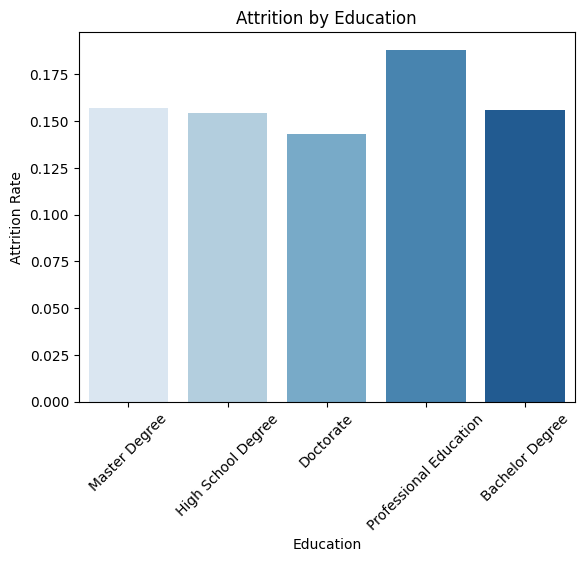

In [42]:
# Plot the relationship between education and attrition
plot4 = sns.barplot(
    data=data,
    y=data.groupby(['education'])['attrition'].transform('mean'),
    palette='Blues',
    x='education',
    hue='education'
)

plot4.set_title("Attrition by Education")
plot4.set_xlabel("Education")
plot4.set_ylabel("Attrition Rate")
plt.xticks(rotation=45)

In [43]:
# Filter education rules
attrition_rules = [
    rule for rule in rules
    if 'attrition=1' in rule.rhs 
    and len(rule.rhs) == 1 
    and len(rule.lhs) == 1 
    and any(status in rule.lhs for status in data['education'].unique())
]

summary_education_df = pd.DataFrame({
    'Education': [rule.lhs[0] for rule in attrition_rules],
    'Support': [rule.support for rule in attrition_rules],
    'Confidence': [rule.confidence for rule in attrition_rules],
    'Lift': [rule.lift for rule in attrition_rules]
})

summary_education_df

,Education,Support,Confidence,Lift
0,Bachelor Degree,0.060585,0.155914,0.963669
1,Doctorate,0.004643,0.142857,0.882968
2,High School Degree,0.017874,0.154309,0.953747
3,Master Degree,0.042711,0.157131,0.971189
4,Professional Education,0.035980,0.188107,1.162646


#### Plot 5: attrition by Education and Martialstatus

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Master Degree'),
  Text(1, 0, 'High School Degree'),
  Text(2, 0, 'Doctorate'),
  Text(3, 0, 'Professional Education'),
  Text(4, 0, 'Bachelor Degree')])

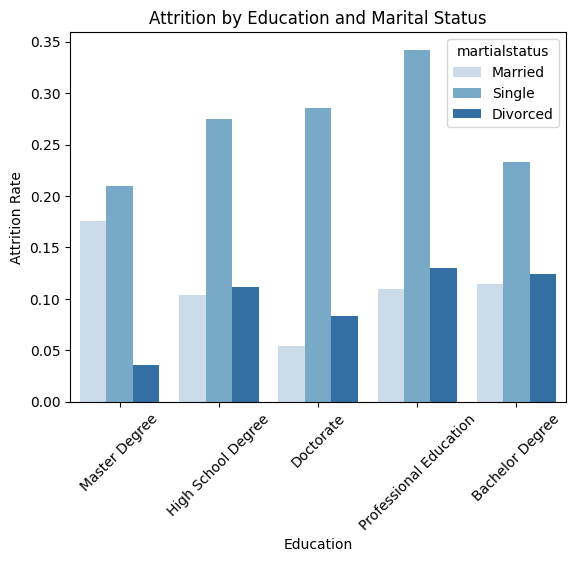

In [44]:
# Plot the relationship between education, martialstatus and attrition
plot5 = sns.barplot(
    data=data,
    x='education',
    y=data.groupby(['education', 'martialstatus'])['attrition'].transform('mean'),
    hue='martialstatus',
    palette='Blues',
)

plot5.set_title("Attrition by Education and Marital Status")
plot5.set_xlabel("Education")
plot5.set_ylabel("Attrition Rate")
plt.xticks(rotation=45)

In [45]:
# Filter the attrition rules
attrition_rules = [
    rule for rule in rules
    if 'attrition=1' in rule.rhs 
    and len(rule.rhs) == 1 
    and len(rule.lhs) == 2 
    and any(education in rule.lhs for education in data['education'].unique())
    and any(mstatus in rule.lhs for mstatus in data['martialstatus'].unique())
]

# Create a summary table
summary_education_mstatus_df = pd.DataFrame({
    'Education': [rule.lhs[1] for rule in attrition_rules],
    'Martialstatus': [rule.lhs[0] for rule in attrition_rules],
    'Support': [rule.support for rule in attrition_rules],
    'Confidence': [rule.confidence for rule in attrition_rules],
    'Lift': [rule.lift for rule in attrition_rules]
})

summary_education_mstatus_df

,Education,Martialstatus,Support,Confidence,Lift
0,Divorced,Bachelor Degree,0.010446,0.124309,0.768328
1,Married,Bachelor Degree,0.020195,0.114625,0.708468
2,Single,Bachelor Degree,0.029944,0.233273,1.441808
3,High School Degree,Divorced,0.003250,0.111111,0.686753
4,Master Degree,Divorced,0.002089,0.036000,0.222508
5,Professional Education,Divorced,0.005339,0.129944,0.803152
6,Single,Doctorate,0.003250,0.285714,1.765936
7,Married,High School Degree,0.005571,0.103896,0.642158
8,Single,High School Degree,0.009053,0.274648,1.697537
9,Master Degree,Married,0.022284,0.176147,1.088724


### Train a Decision Tree Classifier Model

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('dataframe.csv')

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Separate features and target variable
X = data.drop(columns=['attrition'])
y = data['attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 8],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_

# Train the Decision Tree Classifier with the best parameters
best_dt_classifier = grid_search.best_estimator_
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 score: {f1}")
print(f"Confusion matrix: \n {conf_matrix}")

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9849187935034803
F1 score: 0.9553264604810997
Confusion matrix: 
 [[710   3]
 [ 10 139]]


In [47]:
# Show the feature importances
feature_importances = best_dt_classifier.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
21,totalworkingyears,0.100739
0,age,0.088782
2,distancefromhome,0.072798
10,numcompaniesworked,0.063518
12,yearsatcompany,0.063127
7,jobrole,0.061081
9,monthlyincome,0.057747
16,environmentsatisfaction,0.052288
17,jobsatisfaction,0.049370
8,martialstatus,0.045001


#### 1. Welche auffälligen Muster bei der Mitarbeiterfluktuation zeigen sich in den Abbildungen zur deskriptiven Datenanalyse?

Die Analyse der fünf verschiedenen Abbildungen lässt den Schluss zu, dass das Geschlecht der Mitarbeitenden keinen signifikanten Einfluss auf die Mitarbeiterfluktuation zu haben scheint. Darüber hinaus scheint das Bildungsniveau ebenso wenig Einfluss auf die Fluktuationsrate zu nehmen.

Andererseits deuten die Ergebnisse darauf hin, dass der Beziehungsstatus eines Mitarbeiters eine wesentliche Rolle spielt. Es konnte beobachtet werden, dass Singles eine deutlich höhere Wahrscheinlichkeit für einen Jobwechsel aufweisen als Personen, die verheiratet oder geschieden sind. Zudem zeigt sich in den Daten ein Zusammenhang zwischen der Anzahl der Geschäftsreisen und einer erhöhten Fluktuationswahrscheinlichkeit. 

2. Wie gut lässt sich mit Ihrem Modell die Mitarbeiterfluktuation anhand der Daten vorhersagen?

Zur Vorhersage der Mitarbeiterfluktuation wurde ein Entscheidungsbaum verwendet, dessen Evaluation eine Accuracy von 98,5 % sowie einen F1-Score von 95,5 % ergab. Dies lässt den Schluss zu, dass die Mitarbeiterfluktuation mit dem entworfenen Entscheidungsbaum sehr gut vorhersagbar ist. 

3. Welche Maßnahmen könnte die FAUBank den Daten zufolge treffen, um die Mitarbeiterfluktuation zukünftig zu reduzieren?

Die FAUBank könnte potenzielle Mitarbeiterinnen und Mitarbeiter bevorzugen, die aktuell in einer festen Partnerschaft leben oder gelebt haben (Scheidung). Diese Personen könnten aufgrund ihrer Lebenssituation eine höhere Affinität für ein sicheres Arbeitsverhältnis aufweisen und dadurch potenzielle Risiken, die mit einem Jobwechsel einhergehen, vermeiden. Des Weiteren könnte eine Reduktion der Reisetätigkeit der Mitarbeitenden in Erwägung gezogen werden, da die Daten darauf hindeuten, dass mit einer erhöhten Reisetätigkeit das Risiko für Fluktuation steigt. Ebenso wäre zu erwägen, auf Neueinstellungen von Mitarbeitern zu verzichten, die sich bereits kurz vor dem altersbedingten Renteneintritt befinden. Diese Vorgehensweise lässt sich durch die hohe Relevanz der Parameter „age” und „totalworkingyears” für die Klassifizierung des Entscheidungsbaums begründen. 

4. Welche Probleme könnten sich für die FAUBank ergeben, wenn ihre Personalentscheidungen zukünftig anhand von rein datengetriebenen Verfahren getroffen werden?

Die ausschließliche Berücksichtigung von Daten bei personalwirtschaftlichen Entscheidungen, insbesondere mit dem Ziel der Minimierung der Mitarbeiterfluktuation, birgt das Risiko schwerwiegender Diskriminierungen. Dies lässt sich anhand eines Beispiels verdeutlichen: Die unbewusste Nennung des Familienstands in einer Bewerbung kann dazu führen, dass die Chancen auf einen positiven Ausgang des Bewerbungsverfahrens bereits erheblich beeinträchtigt werden. Dies ist insbesondere dann der Fall, wenn der Familienstand „Single“ mit einer erhöhten Fluktuationswahrscheinlichkeit assoziiert wird. 

Darüber hinaus besteht die Möglichkeit, dass die Unternehmenspraxis hinsichtlich der Einstellung neuer Mitarbeiter, welche sich durch den Fokus auf Mitarbeiter ohne Reisetätigkeit oder die Beschränkung der Reisetätigkeit insgesamt auszeichnet, zu einer Beeinträchtigung der Kundenbeziehungen und damit zu einer Reihe weiterer nachteiliger wirtschaftlicher Konsequenzen führt. 